In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy import interpolate
from IPython.display import Audio

In [2]:
music_rate, music_signal = wav.read('music.wav')
sound_rate, sound_signal = wav.read('sound.wav')
noise_1_rate, noise_1 = wav.read('noise1.wav')
noise_2_rate, noise_2 = wav.read('noise2.wav')
noise_3_rate, noise_3 = wav.read('noise3.wav')


In [3]:
def get_variance(snr, signal, noise):
    """
    Function that computes the required variance of the noise to achieve a given SNR.
    """
    #get the norm of the signal and the noise
    norm = np.linalg.norm(signal)**2
    noise_norm = np.linalg.norm(noise)**2
    #compute the variance
    variance = norm/(noise_norm*(np.exp(snr/10)))
    #variance = norm/(noise_norm*(10**(snr/10)))
    return variance

In [52]:
signal = sound_signal
noise = noise_1
#sample a vector of the same size as the signal from the noise
noise = np.random.choice(noise, len(signal), replace=True)
target_snr = 30
variance = get_variance(target_snr, sound_signal, noise)
noisy_signal = sound_signal + noise * np.sqrt(variance)

snr = 10*np.log(np.linalg.norm(sound_signal)**2/np.linalg.norm(noisy_signal-sound_signal)**2)

print("Target SNR: ", target_snr)
print('SNR: ', snr)
print('Variance: ', variance)

Target SNR:  30
SNR:  29.999999999999996
Variance:  0.008757139776931096


In [53]:
#display noisy signal audio object
Audio(noisy_signal, rate=music_rate)

In [60]:
# spectral substraction, chatgpt version

def spectral_subtraction(audio_signal, noise_estimation_signal, alpha=1.0):
    """
    Perform spectral subtraction to enhance an audio signal.

    Parameters:
    - audio_signal: The original audio signal.
    - noise_estimation_signal: The noise estimation signal (usually a segment of the recording with only noise).
    - alpha: Scaling factor for noise estimation (0.0 to 1.0). Higher values make the subtraction more aggressive.

    Returns:
    - Enhanced audio signal with noise removed.
    """

    # Ensure both signals have the same length
    if len(audio_signal) != len(noise_estimation_signal):
        raise ValueError("Input signals must have the same length.")

    # Calculate the power spectral density (PSD) of the signals
    audio_psd = np.abs(np.fft.fft(audio_signal)) ** 2
    noise_psd = np.abs(np.fft.fft(noise_estimation_signal)) ** 2

    # Estimate the spectral noise profile
    estimated_noise_psd = alpha * noise_psd + (1 - alpha) * audio_psd

    # Apply spectral subtraction
    enhanced_psd = audio_psd - estimated_noise_psd
    enhanced_psd[enhanced_psd < 0] = 0  # Ensure non-negativity

    # Reconstruct the enhanced signal using the inverse FFT
    enhanced_signal = np.fft.ifft(np.sqrt(enhanced_psd))
    enhanced_signal = np.real(enhanced_signal)

    return enhanced_signal

# #spectral substraction to remove noise, copilot version
# def spectral_substraction(signal, noise, alpha):
#     """
#     Function that removes noise from a signal using spectral substraction.
#     """
#     #compute the fft of the signal and the noise
#     signal_fft = np.fft.fft(signal)
#     noise_fft = np.fft.fft(noise)
#     #compute the magnitude of the signal and the noise
#     signal_mag = np.abs(signal_fft)
#     noise_mag = np.abs(noise_fft)
#     #compute the phase of the signal and the noise
#     signal_phase = np.angle(signal_fft)
#     noise_phase = np.angle(noise_fft)
#     #compute the magnitude of the noise
#     noise_mag = alpha*noise_mag
#     #compute the magnitude of the signal after substraction
#     signal_mag = np.maximum(signal_mag-noise_mag, 0)
#     #compute the signal after substraction
#     signal_fft = signal_mag*np.exp(1j*signal_phase)
#     #compute the inverse fft of the signal
#     signal = np.fft.ifft(signal_fft)
#     #return the signal
#     return signal


In [65]:
fixed_noise = spectral_subtraction(noisy_signal, noise, 0.5)
#display fixed signal audio object
Audio(fixed_noise, rate=music_rate)

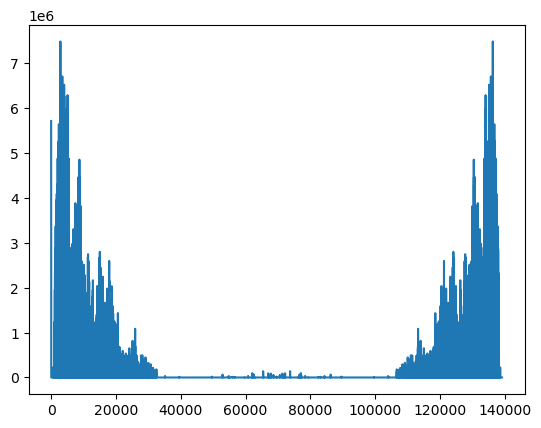

In [67]:
#plot fft of fixed noise
fixed_noise_fft = np.fft.fft(fixed_noise)
plt.plot(np.abs(fixed_noise_fft))


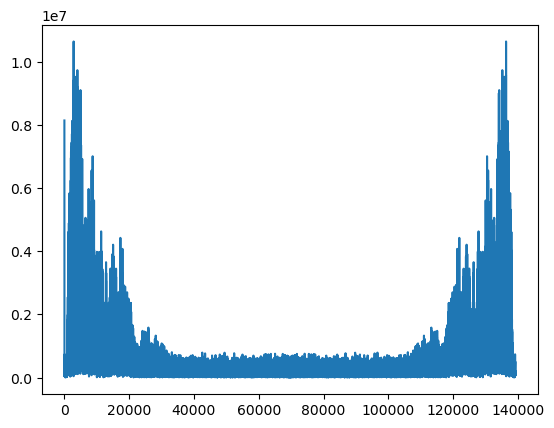

In [68]:
#plot fft of fixed noise
fixed_noise_fft = np.fft.fft(noisy_signal)
plt.plot(np.abs(fixed_noise_fft))
